Imports.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
%matplotlib inline

Read in the training data. Also, convert inc_angle to floats but retain the NaNs.

In [4]:
data = pd.read_json('../data/train.json')
data['inc_angle'] = pd.to_numeric(data['inc_angle'], errors='coerce')

In [5]:
data.head(10)

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0
5,"[-20.769371, -20.769434, -25.906025, -25.90602...","[-29.288746, -29.712593, -28.884804, -28.88480...",b51d18b5,36.9034,1
6,"[-26.673811, -23.666162, -27.622442, -28.31768...","[-24.557735, -26.97868, -27.622442, -29.073456...",31da1a04,34.4751,1
7,"[-24.989119, -27.755224, -25.817074, -24.98927...","[-27.755173, -26.732174, -28.124943, -31.83772...",56929c16,41.1769,0
8,"[-17.146641, -17.146572, -17.994583, -19.44553...","[-25.733608, -24.472507, -24.710424, -22.77215...",525ab75c,35.7829,0
9,"[-24.020853, -23.551275, -27.18819, -29.126434...","[-28.702518, -33.563324, -29.571918, -29.12643...",192f56eb,43.3007,0


Separate the training data into icebergs and ships.

In [6]:
iceberg = data[data['is_iceberg'] == 1]
ship = data[data['is_iceberg'] == 0]

Get a (repeatable) subset of each type of object to play around with.

In [23]:
sub_iceberg = iceberg.sample(n=9, random_state=472)
sub_ship = ship.sample(n=9, random_state=483)

Look at the ships + icebergs in Band 1...

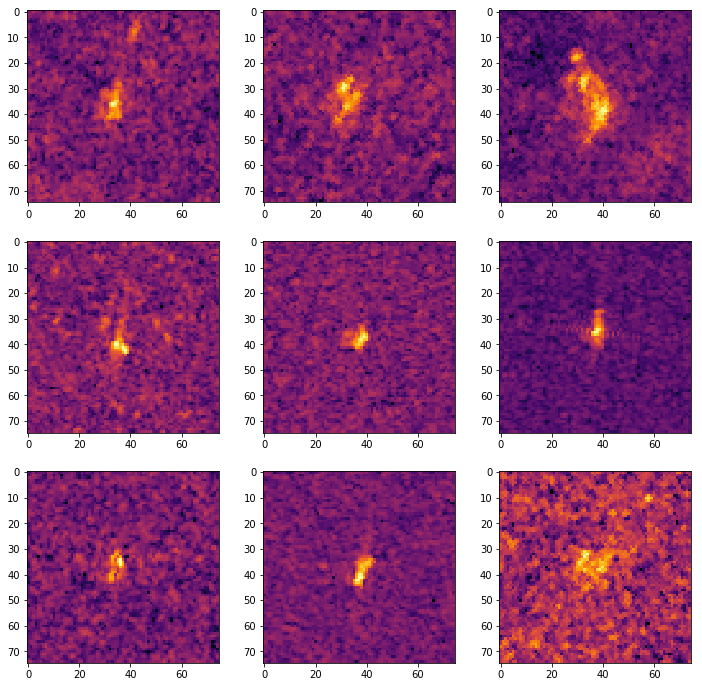

In [24]:
# Icebergs
f = plt.figure(figsize=(12,12))
for i in range(9):
    ax = f.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(sub_iceberg.iloc[i,0]),(75,75))
    ax.imshow(arr,cmap='inferno')

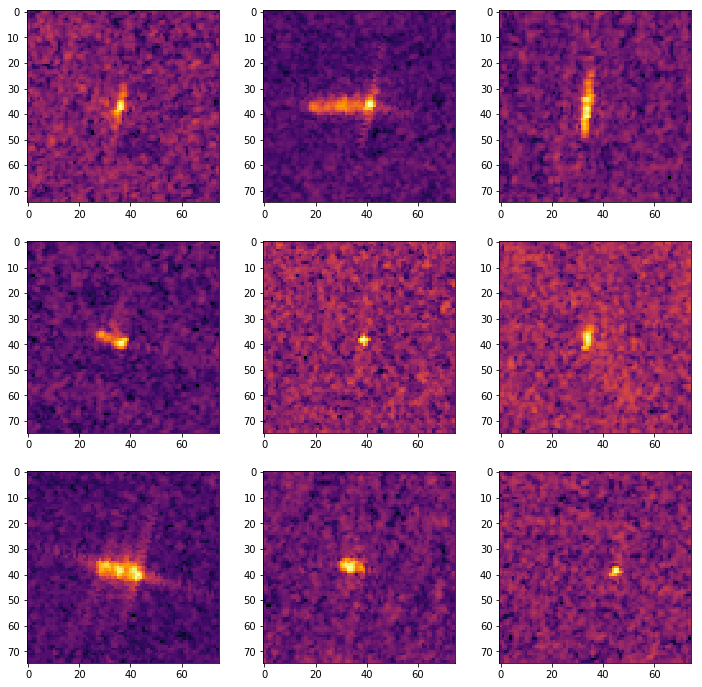

In [25]:
# Ships
f = plt.figure(1,figsize=(12,12))
for i in range(9):
    ax = f.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(sub_ship.iloc[i,0]),(75,75))
    ax.imshow(arr,cmap='inferno')

...and in Band 2.

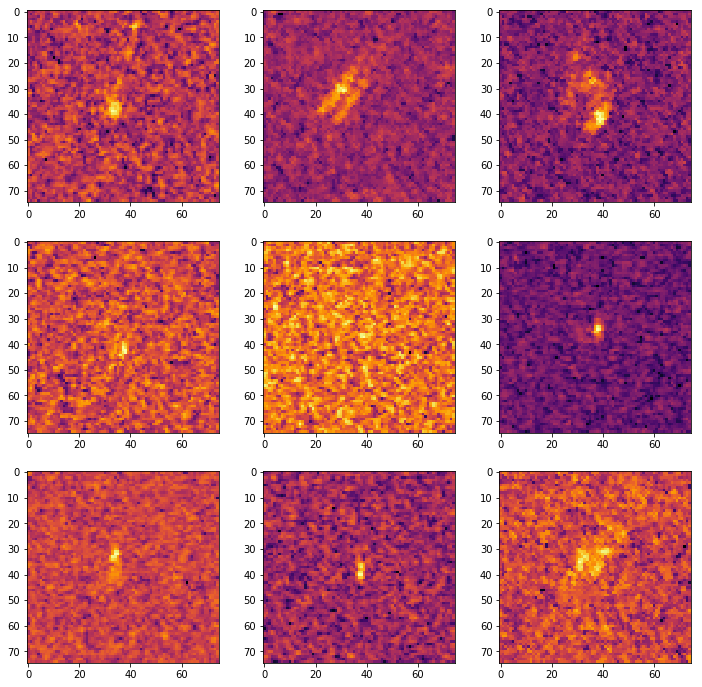

In [26]:
# Icebergs
f = plt.figure(figsize=(12,12))
for i in range(9):
    ax = f.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(sub_iceberg.iloc[i,1]),(75,75))
    ax.imshow(arr,cmap='inferno')

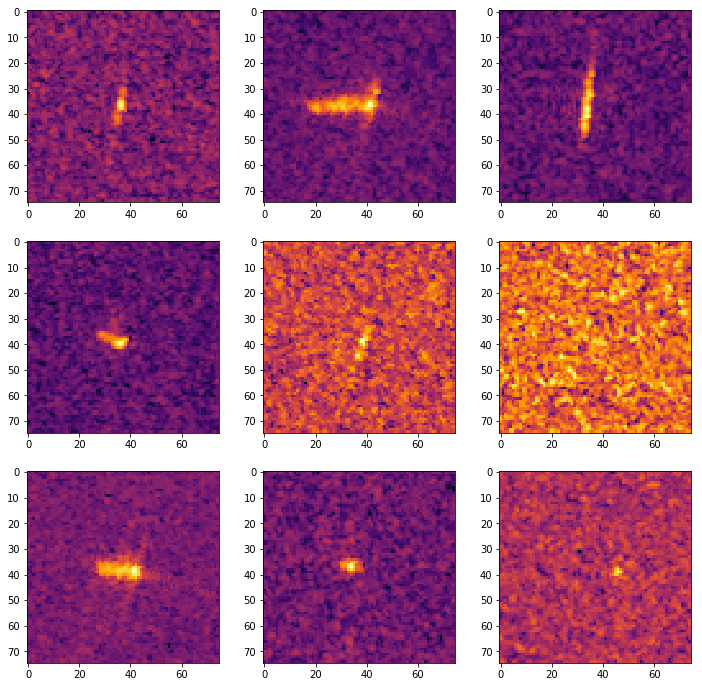

In [27]:
# Ships
f = plt.figure(1,figsize=(12,12))
for i in range(9):
    ax = f.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(sub_ship.iloc[i,1]),(75,75))
    ax.imshow(arr,cmap='inferno')

Let's explore possible edge detection with Sobel operators.  First, define our Sobel operator in the x- and y-direction.

In [30]:
sobx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
soby = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

Now look at the x-derivatives of both ships and icebergs..

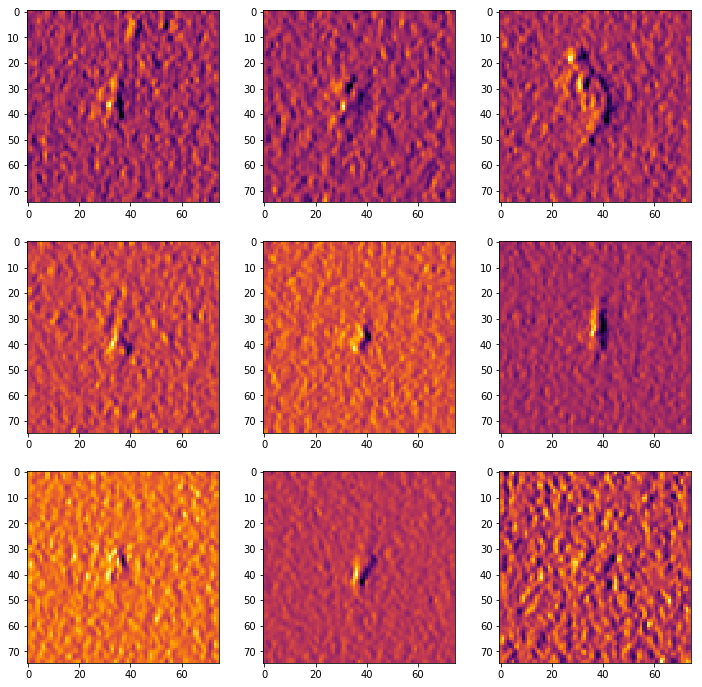

In [31]:
# Icebergs
f = plt.figure(figsize=(12,12))
for i in range(9):
    ax = f.add_subplot(3,3,i+1)
    arr = convolve2d(np.reshape(np.array(sub_iceberg.iloc[i,0]),(75,75)), sobx, boundary='symm', mode='same')
    ax.imshow(arr,cmap='inferno')

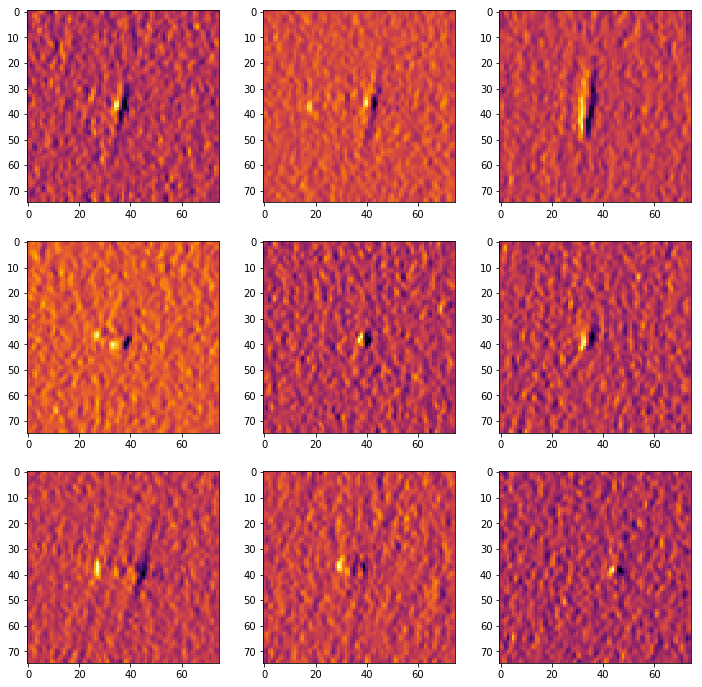

In [32]:
# Ships
f = plt.figure(1,figsize=(12,12))
for i in range(9):
    ax = f.add_subplot(3,3,i+1)
    arr = convolve2d(np.reshape(np.array(sub_ship.iloc[i,0]),(75,75)), sobx, boundary='symm', mode='same')
    ax.imshow(arr,cmap='inferno')

..and band 2.

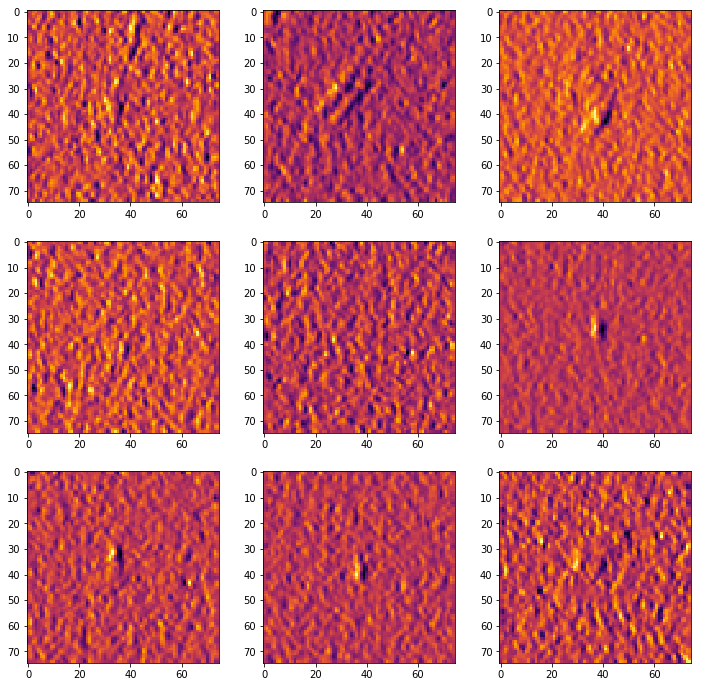

In [34]:
# Icebergs
f = plt.figure(figsize=(12,12))
for i in range(9):
    ax = f.add_subplot(3,3,i+1)
    arr = convolve2d(np.reshape(np.array(sub_iceberg.iloc[i,1]),(75,75)), sobx, boundary='symm', mode='same')
    ax.imshow(arr,cmap='inferno')

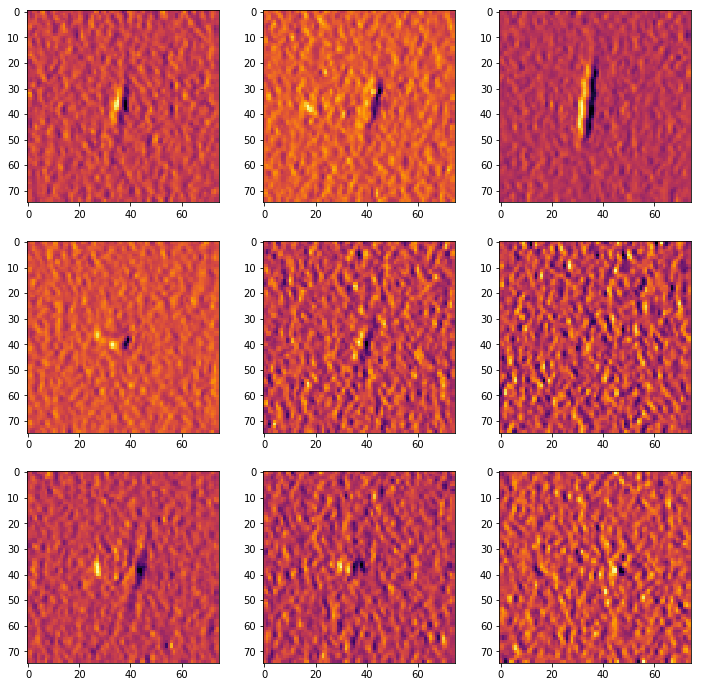

In [36]:
# Ships
f = plt.figure(1,figsize=(12,12))
for i in range(9):
    ax = f.add_subplot(3,3,i+1)
    arr = convolve2d(np.reshape(np.array(sub_ship.iloc[i,1]),(75,75)), sobx, boundary='symm', mode='same')
    ax.imshow(arr,cmap='inferno')